**Biomass HHV Prediction from Proximate Analysis using SVR Modeling**

First read the "HHV_Biomass_Prox.csv" file into "df" (Data Frame) and Plot the Data to watch the Trends (Linear/Non-Linear)

                 Biomass      FC     VM   ASH     HHV Ref.
0          Ailanthus wood  24.80  73.50  1.70  19.000  [1]
1            Akhrot shell  18.78  79.98  1.20  20.008  [2]
2  Alabama Oak wood waste  21.90  74.70  3.30  19.228  [3]
3          Alfalfa pellet  14.77  74.35  9.96  17.840  [4]
4      Alfalfa seed straw  20.15  72.60  7.25  18.450  [5]


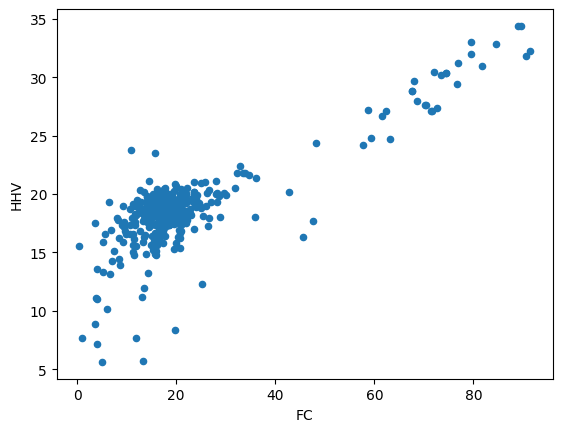

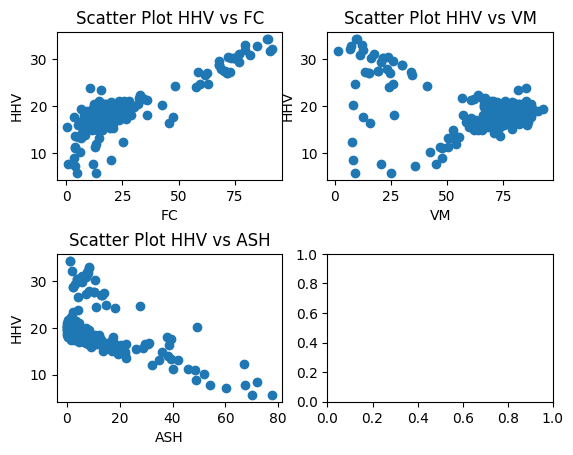

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')
#file_path = '/content/drive/My Drive/Colab Notebooks/data/HHV_Biomass_Prox.csv'
#df = pd.read_csv(file_path)

df = pd.read_csv('HHV_Biomass_Prox.csv')
print(df.head())
df.plot(x='FC', y='HHV', kind='scatter')
fig, axs = plt.subplots(2, 2)   # Creates a 2x2 grid of subplots   OR we can use: plt.subplot(1, 2, 1) ...

FC = df.FC; VM = df.VM; ASH = df.ASH; HHV = df.HHV
axs[0, 0].scatter(FC, HHV)   # Top-left subplotplt.title('Scatter Plot B')
axs[0, 0].set_title('Scatter Plot HHV vs FC'); axs[0, 0].set_xlabel('FC'); axs[0, 0].set_ylabel('HHV')

axs[0, 1].scatter(VM, HHV)   # Top-right subplot
axs[0, 1].set_title('Scatter Plot HHV vs VM'); axs[0, 1].set_xlabel('VM'); axs[0, 1].set_ylabel('HHV')

axs[1, 0].scatter(ASH, HHV)  # Bottom-left subplot
axs[1, 0].set_title('Scatter Plot HHV vs ASH'); axs[1, 0].set_xlabel('ASH'); axs[1, 0].set_ylabel('HHV')

plt.subplots_adjust(hspace=0.5) # Adjust vertical spacing
plt.show()

**SVR Modeling of Data**

Using ths SVR modeling tool in the sklearn Library

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Handle missing values in the required columns before splitting the data
df_cleaned = df[['FC', 'VM', 'ASH', 'HHV']].dropna()

# Define features (X) and target (y)
X = df_cleaned[['FC', 'VM', 'ASH']]
y = df_cleaned['HHV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
# You can experiment with different kernel functions (e.g., 'linear', 'poly', 'rbf')
# and hyperparameters (e.g., C, epsilon)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R-squared: {r2_svr}')

SVR Mean Squared Error: 0.7121699144673361
SVR R-squared: 0.965659169586197


**Plot the Parity Plots of the SVR Model Predictions fits:**

(a) Test data

(b) All dataset

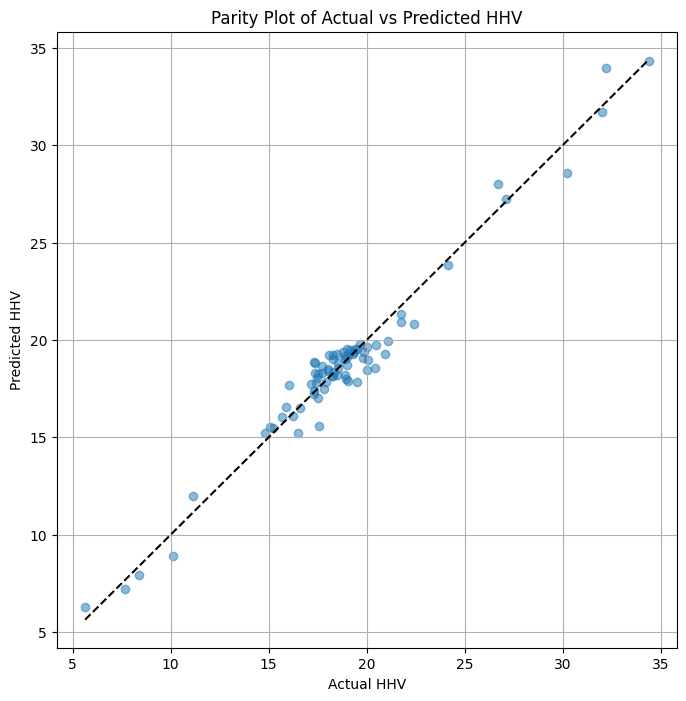

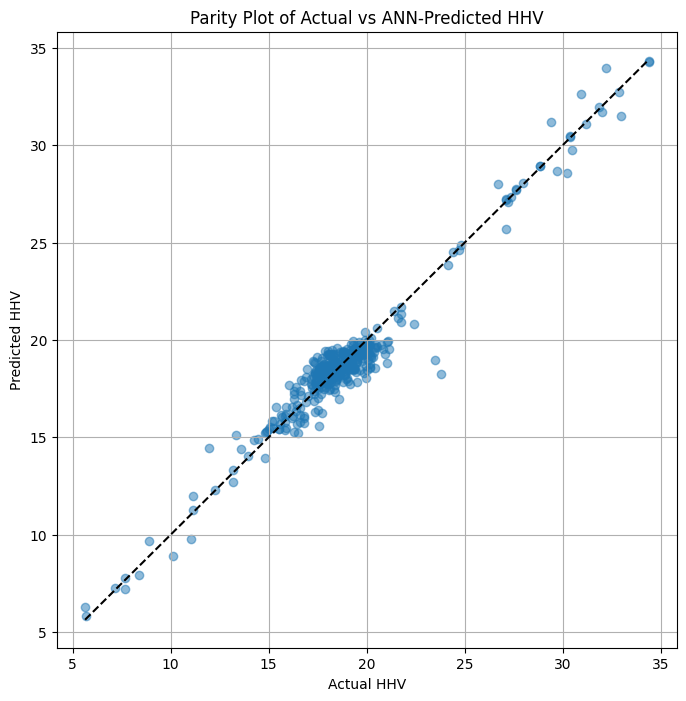

In [9]:
import matplotlib.pyplot as plt

X_whole_scaled = scaler.transform(X)  # X conatins the whole I/P dataset
yPred = svr_model.predict(X_whole_scaled)

# Plot parity plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_svr, alpha=0.5)
plt.xlabel('Actual HHV')
plt.ylabel('Predicted HHV')
plt.title('Parity Plot of Actual vs Predicted HHV')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--') # Add a diagonal line
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(y, yPred, alpha=0.5)
plt.xlabel('Actual HHV')
plt.ylabel('Predicted HHV')
plt.title('Parity Plot of Actual vs ANN-Predicted HHV')
plt.plot([min(y), max(y)], [min(y), max(y)], 'k--') # Add a diagonal line
plt.grid(True)
plt.show()
